<a href="https://colab.research.google.com/github/hungpham13/Distributed-data-discretization/blob/main/Data-preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
# from pyspark.sql.types import ArrayType, DoubleType, BooleanType
# from pyspark.sql.functions import col,array_contains

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2021 = pd.read_csv('diemthi2021.csv')
df2021['D1'].dropna().sample(n = 10000, random_state=1, ignore_index=True)

0       14.45
1       23.40
2       25.00
3       21.25
4       13.80
        ...  
9995    22.75
9996    21.25
9997    19.45
9998    25.55
9999    21.80
Name: D1, Length: 10000, dtype: float64

<AxesSubplot:xlabel='D1', ylabel='Count'>

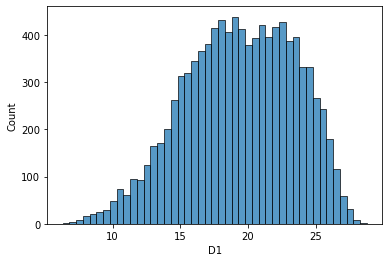

In [ ]:
sns.histplot(df2021['D1'].dropna().sample(n = 10000, ignore_index=True), binwidth=0.5)

<AxesSubplot:xlabel='D1', ylabel='Count'>

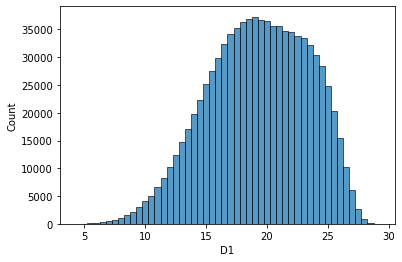

In [ ]:
sns.histplot(df2021['D1'].dropna(), binwidth=0.5)

In [ ]:
def data_create(num_sample = 10000, num_row = 450, year = 2021):
    data = []
    df = pd.read_csv('diemthi'+str(year)+'.csv')

    for i in range(num_row):
        data.append(list(df['D1'].dropna().sample(n = num_sample, ignore_index=True)))
        
    return np.array(data)

In [ ]:
data2021 = data_create(num_row=630)

In [ ]:
data2021.shape

(630, 10000)

In [ ]:
data2021

array([[15.6 , 23.5 , 19.5 , ..., 12.2 , 14.25, 12.7 ],
       [19.6 , 16.15, 21.6 , ..., 12.2 , 15.85, 15.95],
       [21.8 , 24.95, 16.85, ..., 20.85, 16.85, 19.55],
       ...,
       [19.5 , 17.6 , 22.15, ..., 27.1 , 16.05, 13.3 ],
       [18.25, 13.4 ,  8.05, ..., 20.2 , 19.05, 23.05],
       [16.95, 14.55, 21.1 , ..., 19.25, 25.75, 17.85]])

In [ ]:
# pd.DataFrame(data2021).to_csv('2021D1.csv')

In [ ]:
data2018 = data_create(num_row = 30, year = 2018)
data2019 = data_create(num_row = 20, year = 2019)
data2020 = data_create(num_row = 20, year = 2020)

data_other = np.append(data2018, data2019, axis=0)
data_other = np.append(data_other, data2020, axis=0)
data_other

array([[13.05, 18.35, 19.65, ..., 17.3 , 12.65, 15.75],
       [11.75, 13.2 , 10.55, ..., 18.85, 19.85, 13.2 ],
       [16.2 , 13.35, 14.5 , ..., 12.95, 20.9 ,  6.8 ],
       ...,
       [12.1 , 16.  , 15.6 , ..., 22.55, 19.3 , 19.85],
       [20.6 , 21.9 , 20.  , ..., 18.05, 22.75, 15.75],
       [20.8 , 13.05, 20.65, ..., 17.25,  6.  , 15.7 ]])

In [ ]:
# pd.DataFrame(data_other).to_csv('OtherD1.csv')

In [ ]:
df2018 = pd.read_csv('diemthi2018.csv')
df2019 = pd.read_csv('diemthi2019.csv')
df2020 = pd.read_csv('diemthi2020.csv')

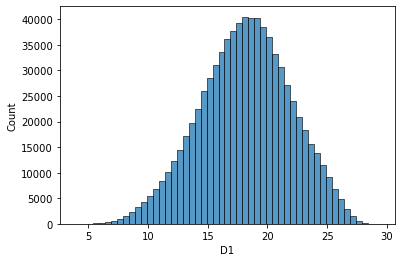

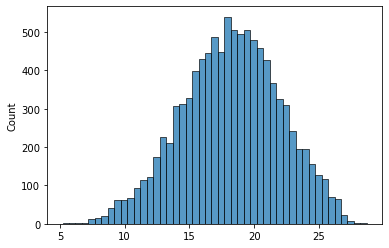

In [ ]:
sns.histplot(df2020['D1'].dropna(), binwidth=0.5)
plt.show()

sns.histplot(data2020[0], binwidth=0.5)
plt.show()

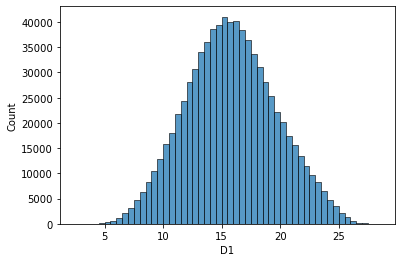

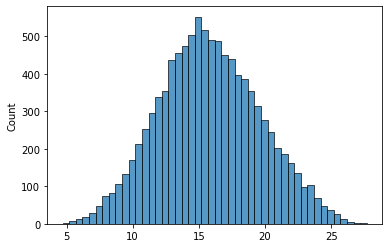

In [ ]:
sns.histplot(df2019['D1'].dropna(), binwidth=0.5)
plt.show()

sns.histplot(data2019[0], binwidth=0.5)
plt.show()

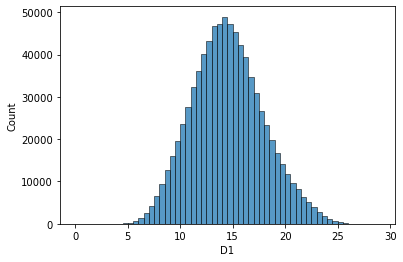

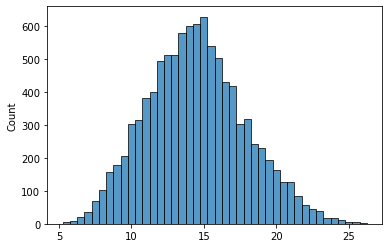

In [ ]:
sns.histplot(df2018['D1'].dropna(), binwidth=0.5)
plt.show()

sns.histplot(data2018[0], binwidth=0.5)
plt.show()

<AxesSubplot:xlabel='D1', ylabel='Density'>

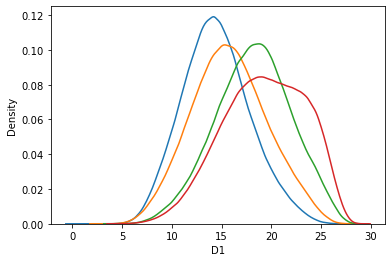

In [ ]:
sns.kdeplot(data = df2018, x = 'D1')
sns.kdeplot(data = df2019, x = 'D1')
sns.kdeplot(data = df2020, x = 'D1')
sns.kdeplot(data = df2021, x = 'D1')

<AxesSubplot:ylabel='Density'>

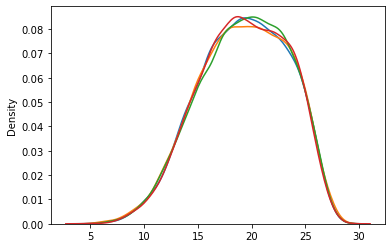

In [ ]:
sns.kdeplot(data2021[0])
sns.kdeplot(data2021[1])
sns.kdeplot(data2021[2])
sns.kdeplot(data2021[100])

In [ ]:
sns.kdeplot(data = df2018, x = 'D1')
sns.kdeplot(data = df2019, x = 'D1')
sns.kdeplot(data = df2020, x = 'D1')
sns.kdeplot(data = df2021, x = 'D1')

In [ ]:
sns.kdeplot(data2021[0])
sns.kdeplot(data2021[1])
sns.kdeplot(data2021[2])
sns.kdeplot(data2021[100])

In [55]:
import random

def generate_shape(bin, num_sample=10000):
    mu_range = [0,1]
    sigma_range = [0.05,0.5]
    result = []
    config = []
    for _ in range(bin):
        mu = random.uniform(mu_range[0], mu_range[1])
        sigma = random.uniform(sigma_range[0], sigma_range[1])
        config.append((mu,sigma))
        s = np.random.normal(mu, sigma, round(num_sample/bin)).tolist()
        result.extend(s)
    sns.kdeplot(result)
    return config

In [140]:
def generate_true_dist(config, num_sample=10000, linestyle='-'):
    result = []
    partial_num = round(num_sample/len(config))
    for (mu,sigma) in config:
        s = np.random.normal(mu, sigma, partial_num).tolist()
        result.extend(s)
    sns.kdeplot(result, linestyle=linestyle)
    return result

def modify_config(config):
    i = np.random.randint(len(config))
    mu_shift = random.uniform(-0.2, -0.1)
    sigma_shift = random.uniform(0.1,0.2)
    return config[:i] + [(config[i][0] + mu_shift, config[i][1] + sigma_shift)] + config[i+1:]

def generate_false_dist(config, num_sample=10000):
    return generate_true_dist(modify_config(config), num_sample,linestyle='--')
    

2


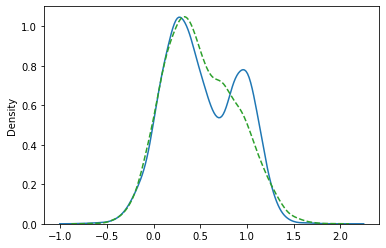

In [132]:
config = generate_shape(4)
s = generate_true_dist(config)
s2 = generate_false_dist(config)

3
0
3
3


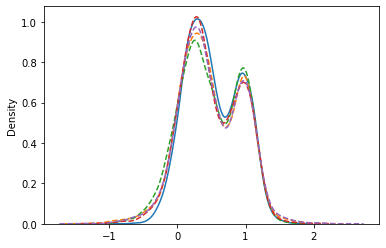

In [143]:
s = generate_true_dist(config)
# s = generate_true_dist(config)
# s = generate_true_dist(config)
# s = generate_true_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)
s2 = generate_false_dist(config)